In [1]:
import os
import numpy as np

In [2]:
def load_img(img_dir, img_list):
    imgs = []
    for i, img_name in enumerate(img_list):    
        if (img_name.split('.')[1] == 'npy'):
            
            img = np.load(img_dir+img_name)
                      
            imgs.append(img)
    imgs = np.array(imgs)
    
    return(imgs)

In [3]:
def imageloader(img_dir, img_list, mask_dir, mask_list, batch_size):

    length = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < length:
            limit = min(batch_end, length)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) # A tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [4]:
from matplotlib import pyplot as plt
import random

In [5]:
train_img_dir = "BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list = os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

In [6]:
batch_size = 2

In [7]:
train_img_datagen = imageloader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)

In [8]:
img, msk = train_img_datagen.__next__()

In [9]:
img_num = random.randint(0,img.shape[0]-1)
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis=3)

In [10]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

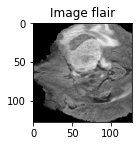

In [11]:
plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')

Text(0.5, 1.0, 'Image t1ce')

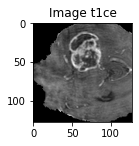

In [12]:
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')

Text(0.5, 1.0, 'Image t2')

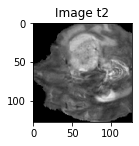

In [13]:
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')

Text(0.5, 1.0, 'Mask')

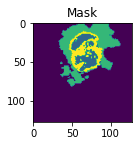

In [14]:
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')